In [168]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [169]:
def thetadot_i(theta,omega_i):
  thetadot_i_vals = np.ones(n)
  for i in range(n):
    thetadot_i_vals[i] = omega_i[i] - K/n * np.sum(np.sin(theta[i] - theta))
  return thetadot_i_vals

def euler(theta, h):
    return theta + h*thetadot_i(theta,omega_i)

def mod_euler(theta, h):
    aux = euler(theta, h)
    return theta + h*(thetadot_i(theta,omega_i) +thetadot_i(aux,omega_i))/2

def routine():
    for i in range(N-1):
        # take current theta value
        currtheta = theta_i_vals[:,i]
        # calculate the next theta value
        theta_i_vals[:,i+1] = mod_euler(currtheta,h)
        # calculate right side of the mean field equation
        thetasum = 1/n * np.sum(np.exp(1j*currtheta))

        # calculate r, the magnitude of the mean field
        rvals.append(np.abs(thetasum))

        # calculate capital Theta of the mean field
        Thetavals.append(np.angle(thetasum))
    return theta_i_vals,rvals,Thetavals


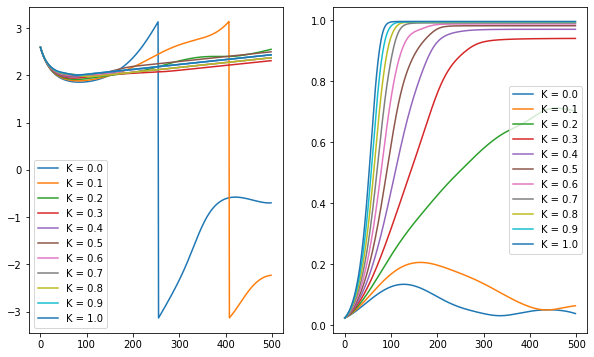

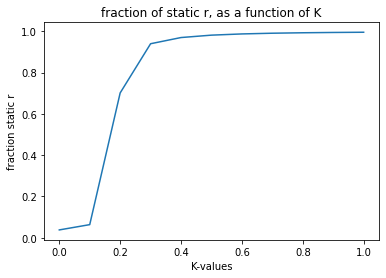

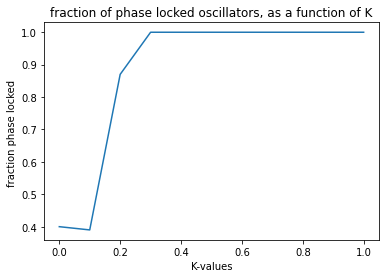

In [172]:
# Easy to run and analyze behaviour
n = 100 # number of oscillators
N = 500 # time steps
h = 0.1 # step size modified euler

fig,ax = plt.subplots(1,2,figsize=(10,6))

# initialize omega_i and theta_i values
omega_i = 0.1 * np.random.randn(n)
theta_init = 2*np.pi*np.random.rand(n) - np.pi
theta_i_vals = np.zeros((n,N))
theta_i_vals[:,0] = theta_init

# initialize parameters
kvals = np.linspace(0,1,11)
rstats = np.zeros(len(kvals))
phaseloq = []

# run algorithm for varying K values
for i,K in enumerate(kvals):
  rvals = []
  Thetavals = []

  thetvals,rval,Thetvals = routine()
  
  # obtain static r by taking the last r value
  rstats[i] = rvals[-1]  

  # to get the phase locking behaviour, take the last 50 theta values
  # and calculate their mean change; check whether the difference 
  # is close to 0, which implies it doesnt change, and so is phase locked
  testthet = thetvals[:,-50:-1]
  meandiff = np.mean(np.diff(testthet,axis=1),axis=1)
  phaseloq.append(sum(np.isclose(0,meandiff,atol=5e-3))/n)

  # plot capital theta and r values over time
  ax[0].plot(range(len(Thetvals)),Thetvals,label=f'K = {round(K,ndigits=2)}')
  ax[0].legend()
  ax[1].plot(range(len(rval)),rval,label=f'K = {round(K,ndigits=2)}')
  ax[1].legend()

plt.show()

# plot the fraction of static r, and fraction of phase locked oscillators,
# as a function of K
plt.plot(kvals,rstats)
plt.title('value of static r, as a function of K')
plt.xlabel('K-values')
plt.ylabel('fraction static r')
plt.show()

plt.plot(kvals,phaseloq)
plt.title('fraction of phase locked oscillators, as a function of K')
plt.xlabel('K-values')
plt.ylabel('fraction phase locked ')
plt.show()

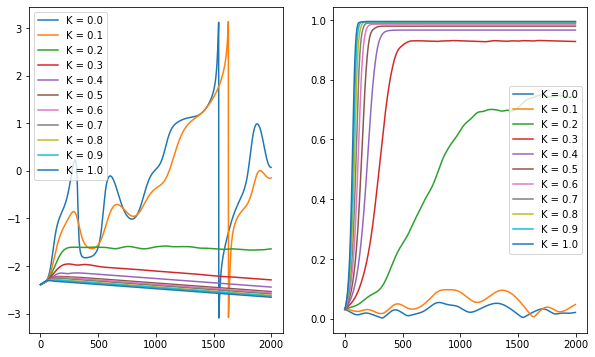

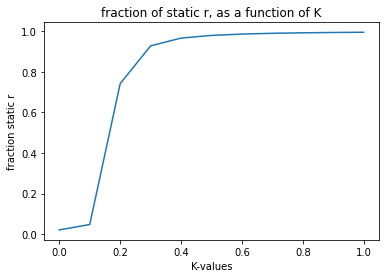

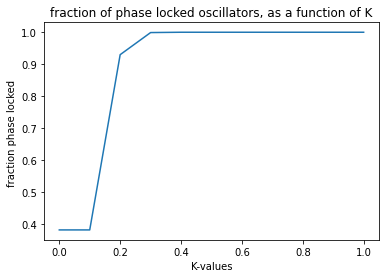

In [175]:
# Longer run, more realistic outcomes

n = 1000 # number of oscillators
N = 2000 # time steps
h = 0.1 # step size modified euler

fig,ax = plt.subplots(1,2,figsize=(10,6))

# initialize omega_i and theta_i values
omega_i = 0.1 * np.random.randn(n)
theta_init = 2*np.pi*np.random.rand(n) - np.pi
theta_i_vals = np.zeros((n,N))
theta_i_vals[:,0] = theta_init

# initialize parameters
kvals = np.linspace(0,1,11)
rstats = np.zeros(len(kvals))
phaseloq = []

# run algorithm for varying K values
for i,K in enumerate(kvals):
  rvals = []
  Thetavals = []

  thetvals,rval,Thetvals = routine()
  
  # obtain static r by taking the last r value
  rstats[i] = rvals[-1]  

  # to get the phase locking behaviour, take the last 50 theta values
  # and calculate their mean change; check whether the difference 
  # is close to 0, which implies it doesnt change, and so is phase locked
  testthet = thetvals[:,-50:-1]
  meandiff = np.mean(np.diff(testthet,axis=1),axis=1)
  phaseloq.append(sum(np.isclose(0,meandiff,atol=5e-3))/n)

  # plot capital theta and r values over time
  ax[0].plot(range(len(Thetvals)),Thetvals,label=f'K = {round(K,ndigits=2)}')
  ax[0].legend()
  ax[1].plot(range(len(rval)),rval,label=f'K = {round(K,ndigits=2)}')
  ax[1].legend()

plt.show()

# plot the fraction of static r, and fraction of phase locked oscillators,
# as a function of K
plt.plot(kvals,rstats)
plt.title('value of static r, as a function of K')
plt.xlabel('K-values')
plt.ylabel('fraction static r')
plt.show()

plt.plot(kvals,phaseloq)
plt.title('fraction of phase locked oscillators, as a function of K')
plt.xlabel('K-values')
plt.ylabel('fraction phase locked ')
plt.show()

In [170]:
# PLOTTING THETA AND R FOR VARYING K VALUES
# # K = 0.5 # coupling strength
# n = 100 # number of oscillators
# N = 500 # time steps
# h = 0.1 # step size modified euler

# fig,ax = plt.subplots(1,2)

#   # initialize omega_i and theta_i values
# omega_i = 0.1 * np.random.randn(n)
# theta_init = 2*np.pi*np.random.rand(n) - np.pi
# theta_i_vals = np.zeros((n,N))
# theta_i_vals[:,0] = theta_init

# for K in [0.2,0.4,0.6,0.8,1]:
# # for K in [0.1,0.2,0.4,0.6,1]:
#   rvals = []
#   Thetavals = []

#   thetvals,rval,Thetvals = routine()

#   ax[0].plot(range(len(Thetvals)),Thetvals,label=f'K = {K}')
#   ax[0].legend()
#   ax[1].plot(range(len(rval)),rval,label=f'K = {K}')
#   ax[1].legend()

In [171]:
# PLOTTING FRACTION OF STATIC R'S AND PHASE LOCKED OSCILLATORS FOR VARYING R
# n = 100 # number of oscillators
# N = 1000 # time steps
# h = 0.1 # step size modified euler

# # initialize omega_i and theta_i values
# omega_i = 0.1 * np.random.randn(n)
# theta_init = 2*np.pi*np.random.rand(n) - np.pi
# theta_i_vals = np.zeros((n,N))
# theta_i_vals[:,0] = theta_init

# kvals = np.linspace(0,1,11)
# rstats = np.zeros(len(kvals))
# phaseloq = []

# for i,K in enumerate(kvals):
#   rvals = []
#   Thetavals = []

#   thetvals,rval,Thetvals = routine()

#   rstats[i] = rvals[-1]  
#   testthet = thetvals[:,-50:-1]
#   meandiff = np.mean(np.diff(testthet,axis=1),axis=1)
#   phaseloq.append(sum(np.isclose(0,meandiff,atol=5e-3))/n)

# plt.plot(kvals,rstats)
# plt.title('fraction of static r, as a function of K')
# plt.xlabel('K-values')
# plt.ylabel('fraction static r')
# plt.show()

# plt.plot(kvals,phaseloq)
# plt.title('fraction of phase locked oscillators, as a function of K')
# plt.xlabel('K-values')
# plt.ylabel('fraction phase locked ')
# plt.show()